# Business Understanding

## Project Domain

Domain:Kesehatan Digital (Digital Health)


Obesitas merupakan salah satu masalah kesehatan masyarakat paling signifikan di abad ke-21. Dalam domain kesehatan digital, penggunaan data dan teknologi untuk membantu prediksi penyakit dan mendukung keputusan medis semakin berkembang.Proyek ini berada dalam domain tersebut, yaitu menggabungkan data gaya hidup dan kesehatan individu untuk memprediksi status gizi/obesitas menggunakan model machine learning dan artificial intelligence.

## Problem Statements

Banyak faktor yang memengaruhi kondisi berat badan seseorang, seperti:


*   Pola makan (konsumsi makanan cepat saji, alkohol, sayur)
*   Aktivitas fisik (frekuensi olahraga, berjalan kaki, duduk lama)
*   Gaya hidup (jam tidur, waktu menggunakan teknologi)
*   Faktor genetik (riwayat obesitas keluarga)












## Goals



*   Menyediakan sistem pendukung keputusan untuk diagnosa awal obesitas.
*   Meningkatkan kesadaran masyarakat terhadap pengaruh gaya hidup terhadap kesehatan tubuh.


*   Membantu lembaga kesehatan dan pengembang aplikasi membuat layanan personalized health recommendation.





## Solution Statements



*   Penerapan Artificial Neural Network (ANN)
ANN dipilih karena kemampuannya dalam menangani hubungan non-linier dan menghasilkan akurasi tinggi untuk klasifikasi multikategori seperti klasifikasi ObesityCategory (Underweight, Normal, Overweight, dll).
*   Pengembangan Aplikasi Web Interaktif dengan Streamlit
Untuk mempermudah penggunaan oleh tenaga kesehatan, pengguna umum, atau pihak terkait, model prediksi diintegrasikan ke dalam aplikasi web berbasis Streamlit.

*  Optimasi Model dengan TensorFlow Lite (TFLite)
Agar model ANN dapat digunakan di lingkungan terbatas (seperti perangkat mobile atau deployment ringan), model dikonversi ke format TensorFlow Lite.






# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daffawachtur","key":"e1e696d6caef623b6c8764b0bff216fc"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mrsimple07/obesity-prediction

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction
License(s): apache-2.0


In [4]:
!mkdir obesity-prediction
!unzip obesity-prediction.zip -d obesity-prediction
!ls obesity-prediction

Archive:  obesity-prediction.zip
  inflating: obesity-prediction/obesity_data.csv  
obesity_data.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/obesity-prediction.zip')

In [7]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


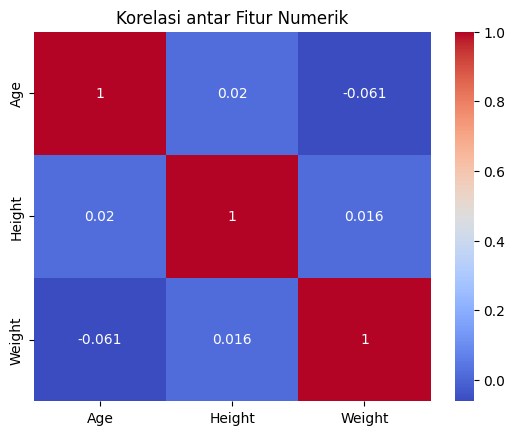

In [12]:
numerical_features = ['Age', 'Height', 'Weight']
correlation = df[numerical_features].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

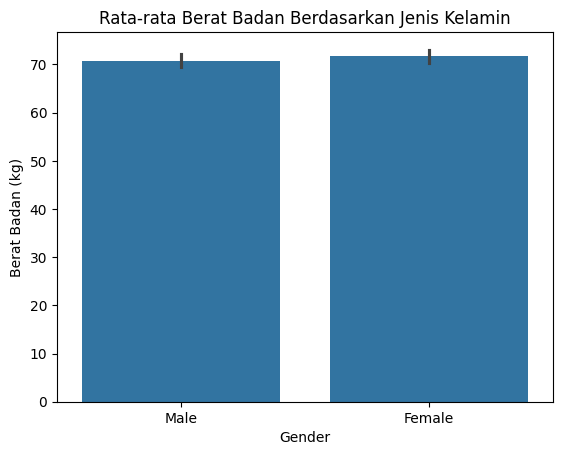

In [13]:
sns.barplot(x='Gender', y='Weight', data=df)
plt.title('Rata-rata Berat Badan Berdasarkan Jenis Kelamin')
plt.xlabel('Gender')
plt.ylabel('Berat Badan (kg)')
plt.show()

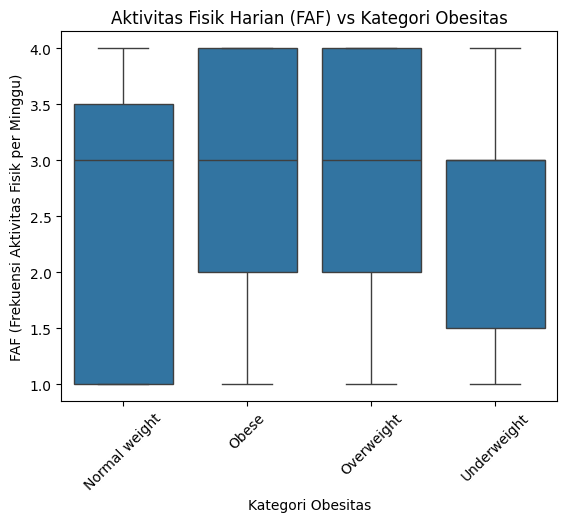

In [14]:
sns.boxplot(x='ObesityCategory', y='PhysicalActivityLevel', data=df)
plt.title('Aktivitas Fisik Harian (FAF) vs Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('FAF (Frekuensi Aktivitas Fisik per Minggu)')
plt.xticks(rotation=45)
plt.show()

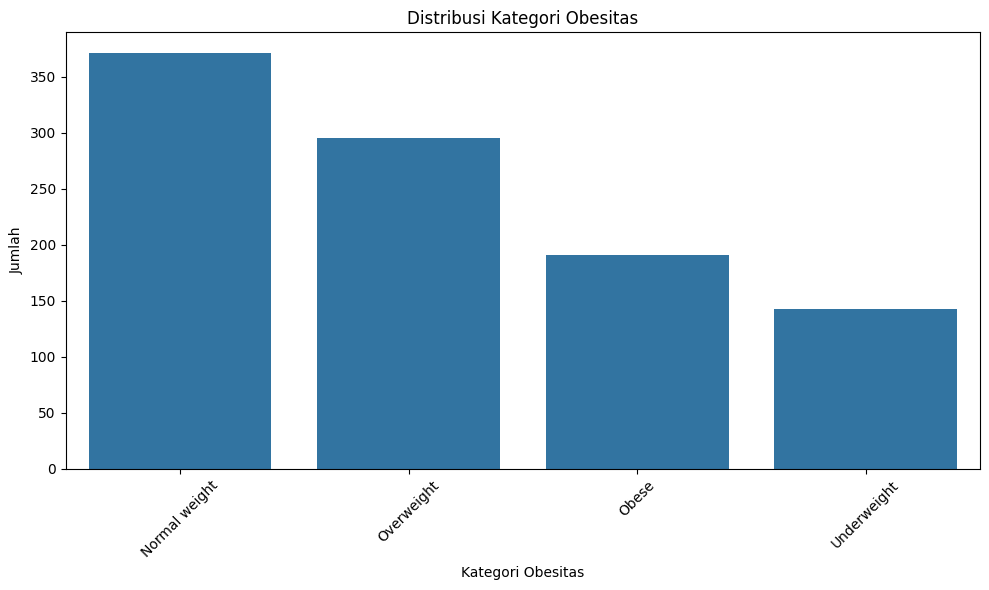

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ObesityCategory', data=df, order=df['ObesityCategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

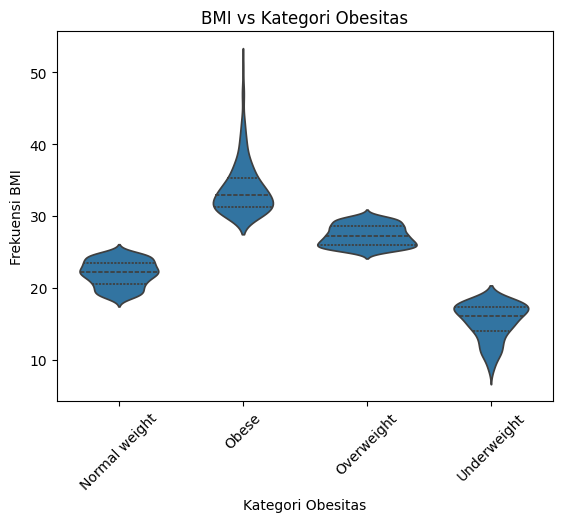

In [16]:
sns.violinplot(x='ObesityCategory', y='BMI', data=df, inner='quartile')
plt.title('BMI vs Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Frekuensi BMI')
plt.xticks(rotation=45)
plt.show()

# Data Preparation

In [17]:
# Salin dataframe
data = df.copy()

# Label encode semua fitur kategori
label_cols = data.select_dtypes(include="object").columns
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [18]:
# Pisahkan fitur dan target
X = data.drop("ObesityCategory", axis=1)
y = data["ObesityCategory"]

In [19]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Modeling

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,660 (10.39 KB)

 Trainable params: 2,660 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

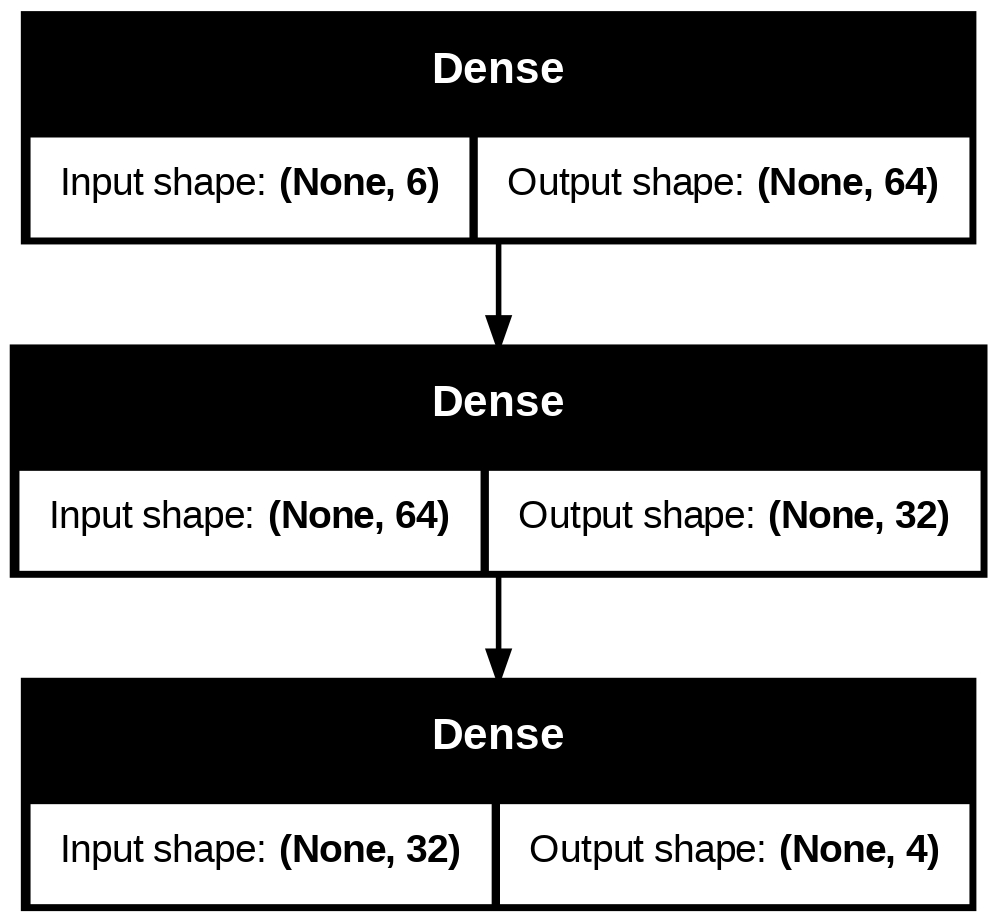

In [25]:
plot_model(model, show_shapes = True)

In [26]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3499 - loss: 1.3617 - val_accuracy: 0.6050 - val_loss: 1.0456
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6491 - loss: 0.9601 - val_accuracy: 0.7450 - val_loss: 0.7401
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8171 - loss: 0.6517 - val_accuracy: 0.9100 - val_loss: 0.5186
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9083 - loss: 0.4576 - val_accuracy: 0.8950 - val_loss: 0.3957
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9182 - loss: 0.3465 - val_accuracy: 0.9100 - val_loss: 0.3239
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.2718 - val_accuracy: 0.9050 - val_loss: 0.2826
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9452 - loss: 0.2310 - val_accuracy: 0.9150 - val_loss: 0.2492
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.2089 - val_accuracy: 0.9250 - val_loss:

# Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2%}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9687 - loss: 0.0908 

✅ Test Accuracy: 97.50%


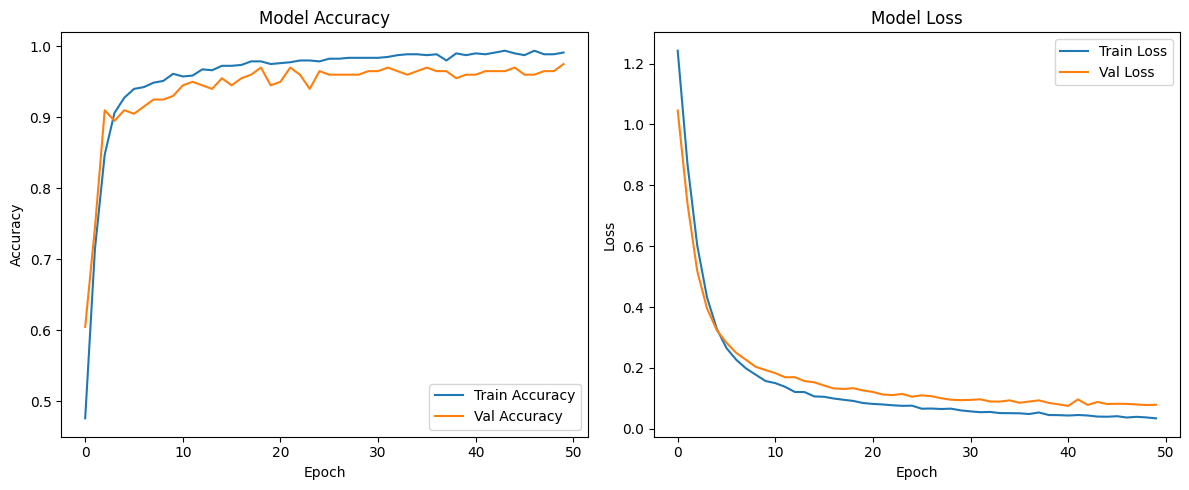

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


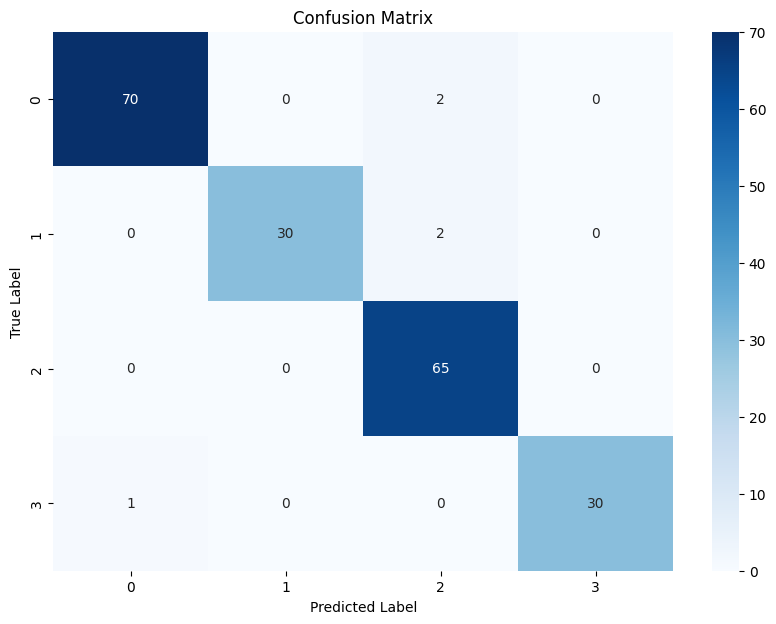

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       1.00      0.94      0.97        32
           2       0.94      1.00      0.97        65
           3       1.00      0.97      0.98        31

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.97      0.98       200



In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [30]:
def predict_obesity(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction)

    # Decode label hasil prediksi
    return le.inverse_transform([predicted_class])[0]

In [31]:
sample_input = [21, 0, 45, 155, 33.2, 1]  # Disesuaikan dengan jumlah dan urutan fitur
result = predict_obesity(sample_input)
print("✅ Prediksi kelas obesitas:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ Prediksi kelas obesitas: Obese


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Save Model

In [36]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('obesity_prediction.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpq59du7le'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137651512982032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137651512981648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137649778853264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137649778852112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137651512981840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137649778852880: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [33]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']